# Deep Learning with Python
---

In [8]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

**NOTES**

* Skip connections, is a method to simplify the optimization of neural networks. It makes easier to the Adam optimizer to find the global minimum of the network's loss function. In Keras, implementing a Skip connection, is as simple as using a "Concatenate" layer to concatenate the inputs to the deep netowrk's outputs, right before the final output layer.

```
InputText ---> EmbeddingLayer ---> LSTM_Layer ----------------------\
InputNumerics(Float) --------------------------------------------------> ConcatLayer ---> OutputLayer
InputImages ---> ConvolutionalLayer ---> ConvolutionalLayer---------/
```


## 1_Introduction to Deep Learning

### Basics of DL and NN


The layer at the left is "Input Layer" \
The layer at the right is "Output Layer"\
Tha layers in the middle are "Hidden Layers"

Each node in the hidden layer, represents an aggregation of information from our input data, and each node adds to the model's ability to capture interactions. The more nodes we have, the more interactions we capture.

#### Forward propagation

The weights, are the parameters we train when we fit a NN to the data. In this case, we multiply each input variable by the corresponding weights and then sum (dot product); and so on with each layer until the Output node.

1. Multiply - add process
2. Dot product
3. Forward propagation for one data point at a time
4. Output is the prediction for that data point



In [12]:
input_data = np.array([2, 3])
weights = { 'node_0': np.array([1, 1]),
            'node_1': np.array([-1, 1]),
            'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value,node_1_value])

output = (hidden_layer_values * weights['output']).sum() #Dot product
print(output)

9


#### Activation Function

Some examples of activation functions, are:

* Sigmoid
* Tanh
* ReLU (Rectified Linear Activation)

In [4]:
input_data = np.array([2, 3])
weights = { 'node_0': np.array([1, 1]),
            'node_1': np.array([-1, 1]),
            'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

hidden_layer_values = np.array([node_0_output,node_1_output])

output = (hidden_layer_values * weights['output']).sum() #Dot product
print(output)

1.2382242525694254


In [5]:
#With RELU

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


In [6]:
# Applied to many observations

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)     

[8, 12]


#### Deeper networks


In a model for image recognition, we have this example:
1. First hidden layers, identify lines (horizontal, vertical, diagonal)
2. Find larger patterns like big squares
3. Later layers might put together the location of squares and geometric shapes, to identify a face, a car, etc.

We don't need to specify those interactions/patterns, the NN gets weights that find the relevant patterns to make better predictions.

**NOTES** 
- The model training process sets them to optimize predictive accuracy.
- The last layers capture the most complex interactions.

#### With 2 hidden layers

In [11]:
weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


112


### Optimizing a neural network with backward propagation

#### Loss function

Lower loss function value means a better model. It can be modeled in a 3D space, where X and Y are the weights, and Z is the value from the loss function.

The goal is to find the values for weights, where we have the lowest value for the loss function. The algorithm used is "gradient descent", which uses the slope to find a flat point in the function.

The steps are:
1. Find the slope
2. Take a step downhill
3. Repeat until you get to the mi value where the slope/derivative is 0

In [13]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

target_actuals = [1, 3, 5, 7]

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 7.750000


#### Gradinet descent

It is used to optimize weights in a model, if slope is positive:
* Move to lower numbers
* Substract the slope from the current Value
* Too big step might lead us astray

So, insted of directly substracting the slope, we multiply the slope by a small number, called **learning rate**.

Solution: Learning Rate
- Update each weight by substracting $LearningRate * Slope$
    - $NewWeight = Weight - LearningRate * Slope$
- LR are frequently around 0.01
- This ensures small steps to reach the optmal weights

(3) --2--> (6)
Target = 10

$SlopeForWeight -Or- GradientsForWeights = $\
(Slope of the loss function respect the output node) --> 2*(PredictedValue-ActualValue) Or 2*Error = 2(-4)\
(Input Data) --> 3\
(Slope of activation funtion we feed) --> In this case is the identity.

$SlopeForWeight = 2*-4*3$ \
$SlopeForWeight = -24$

If learning_rate = 0.01, the new weight would be: 
 
$2 - (-24 * 0.01) = 2.24$

Then,  repeat this for each weight for multiple times.

In [29]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

#Slope
gradient = 2* input_data * error

weights_updated = weights - learning_rate * gradient
print(weights_updated)
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

#Great work! As you can see, the mean squared error decreases as the number of iterations go up.


5
[0.7 1.6]
2.5


#### Backpropagation

It is used to calculate the slopes you need to optimize more complex deep learning models.

It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs.

* Trying to estimate the slope of the loss function w.r.t. each weight
* First Forward propagation to calculate predictions and errors

Each time you generate predictions using forward propagation, you update the weights using backward propagation.

In [ ]:
# target = 4
# error = 3 
# ReLU = 1, since the output node is positive

# (1) -1-> (7)
# (3) -2-/

1. Start at some random set of weights
2. Use forward propagation to make a prediction
3. Use backward propagation to calculate the slope of the loss function w.r.t. each weight
4. Multiply that slope by the learning rate, and substract from the current weights
4. Keep going until we get to a flat part

##### Stochastic gradient descent
* It´s common to calculate slopes on only a subset of the data (called a batch)
* Use a different batch of data to calculate the next update
* Start over from the beggining once all data is used
* Each time through the training data is called an epoch
* When slopes are calculated on one batch at a time, is called **stochastic gradient descent**

### Building deep learning models with Keras

Model building steps:
1. Specify Architecture (Layers, nodes, activation functions)
2. Compile
3. Fit
4. Predict

#### Creating a model

```py
#Code
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

predictors = np.loadtxt(path + '\predictors_data.csv', delimiter = ',')
n_cols = predictors.shape[1] #Number of nodes in input layer

model = Sequential() #An easy way with simple connections

#In Dense layers, all the nodes in the previous layer connect to all the nodes in the current layer. 
#Here, we add layers
model.add(Dense(100, activation='relu', input_shape = (n_cols,))) #100 nodes, activation function
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) #A single output layer 

#This model has 2 hidden layers and an output layer
```


#### Compiling and fitting a model




Creates an inernal function to do back-propagation effitiently.

It has two main arguments:

1. Optimizer (which controls the learning rate)
    - 'Adam' is a good LR optimizer  
 
2. Loss function
    - MSE ia common for regression

```py
#Code to compile
n_cols = predictors.shape[1] #Number of nodes in input layer

model = Sequential() #An easy way with simple connections

#In Dense layers, all the nodes in the previous layer connect to all the nodes in the current layer. 
#Here, we add layers
model.add(Dense(100, activation='relu', input_shape = (n_cols,))) #100 nodes, activation function
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) #A single output layer 

model.compile(optimzer='adam', loss='mean_squared_error')

#Scaling data before fitting can ease optimization
model.fit(predictors, target)

```

#### Classification models

* Loss function: **'categorical_crossentropy'** 
* Instead of MSE, and is the most common. 
* AKA as LogLoss, where: Lower scores are better.
* Add 'metrics = ['accuracy'], to compile step for easy-to-understand diagnostics and prints accuracy.
* Ouput layer has separte node for each possible outcome, and uses **'softmax'** activation. (to be able to interpret as porobabilities)
* 'sgd' optimizer, which stands for Stochastic Gradient Descent.

```py
#Code
from tensorflow.keras.utils import to_categorical

data = np.loadtxt(path + '\basketball_data.csv', delimiter = ',')
predictors = data.drop(['shot_result'], axis=1).values
target = to_categorical(data['shot_result'])

model = Sequential()

model.add(Dense(100, activation='relu', input_shape = (n_cols,))) #100 nodes, activation function
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax')) #A double output layer 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)
```

In [12]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical #One Hot Encoding
import numpy as np
import pandas as pd

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'
df = pd.read_csv(path + r'\titanic_all_numeric.csv', delimiter = ',')

predictors = df.drop(['survived'], axis=1).values
predictors = np.asarray(predictors).astype('float32')
# Convert the target to categorical: target
target = to_categorical(df.survived)

n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 1ms/step - loss: 4.4894 - accuracy: 0.5713


In [135]:
model.predict(predictors[0:1])

1/1 [==============================] - 0s 22ms/step


array([[0.8684881, 0.1315119]], dtype=float32)

#### Using models

1. Save
2. Reload
3. Predict

```py
from tensforlow.keras.models import load_model
model.save('model_file.h5')
my_model = load_model('model_file.h5')
predictions = my_model.predict(data_to_predict_with)

#To get only success probabilities
probability_true = predictions[:,1]

#View summary
my_model.summary()

```

### Fine-tuning Keras models

#### Optimization

The dying neuron problem occurs when a neuron takes a value less than 0 for all of the data.

The vanishing gradients problem. occurs when many layers have very small slopes and in deep networks, updates to backprop were close to 0

In [149]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'
df = pd.read_csv(path + r'\titanic_all_numeric.csv', delimiter = ',')

predictors = df.drop(['survived'], axis=1).values
predictors = np.asarray(predictors).astype('float32')
# Convert the target to categorical: target
target = to_categorical(df.survived)


def get_new_model(input_shape=(n_cols,)):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001



c:\Otro\Anaconda\envs\GPU_AMI\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


28/28 [==============================] - 0s 922us/step - loss: 2.2216


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 850us/step - loss: 1.2472


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 923us/step - loss: 6291748864.0000


#### Model Validation

* K-fold cross validation is not usually used, because deep learning models are run on large datasets
* Single vlaidation score is based on large amount of daa, and is reliable

In [155]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, callbacks=[early_stopping_monitor], epochs=5)

# In this case, the model will run 5 epochs, except if it's stopped by the EarlyStopping
# Patience: How many epochs the model can go withput improving before we stop training. 2 or 3 are reasonable
early_stopping_monitor = EarlyStopping(patience=2)
# Callbacks is a list, and can be used many callbacks
# By default Keras uses 10 epochs

Epoch 1/5
20/20 [==============================] - 0s 9ms/step - loss: 1.0804 - accuracy: 0.6164 - val_loss: 0.6530 - val_accuracy: 0.6940
Epoch 2/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6774 - val_loss: 0.6739 - val_accuracy: 0.6604
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6421 - val_loss: 0.5565 - val_accuracy: 0.7612
Epoch 4/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.7095 - val_loss: 0.5125 - val_accuracy: 0.7463
Epoch 5/5
20/20 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7207 - val_loss: 0.5598 - val_accuracy: 0.7425


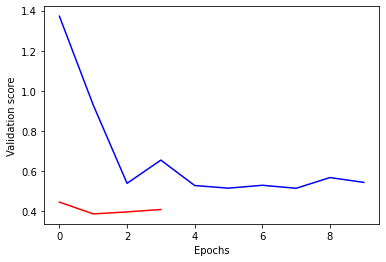

In [159]:
import matplotlib.pyplot as plt

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#### Model capacity

Or network capacity, is closely related to the terms overfitting and underfitting. Increasing the number of nodes or the hidden layers, increases the model capacity.

1. Start with a small network
2. Gradually increase capacity
3. Keep increasing capacity until validation socre is no longer improving

---

## 2_Introduction to TensorFlow

### Introduction

Is an open source lubrary for graph-based numerical computation developed by google.

* low and high level APIs
* Machine learning models

A tensor is a  generalization of vectors and matrices to potentially higher dimensions.

```py
- tf.constant()
- tf.zeros()
- tf.zeros_like(input_tensor)
- tf.ones()
- tf.ones_like(input_tensor)
- tf.fill([3,3], 7)
- tensor.numpy() #To change to a numpy array
```

TensorFlow extensions:

1. TensorFlow Hub
    - Pretrained models
    - Transfer learning

2. Tensorflow Probability
    - Statistical distributions
    - Trainable distributions
    - Extended set of optimizers


#### Tensors

In [13]:
import tensorflow as tf

# 0D Tensor
d0 = tf.ones((1,))
print(d0,"\n")

# 1D Tensor
d1 = tf.ones((2,))
print(d1,"\n")

# 2D Tensor
d2 = tf.ones((2,2))
print(d2,"\n")

# 3D Tensor
d3 = tf.ones((2,2,2))
print(d3,"\n")

tf.Tensor([1.], shape=(1,), dtype=float32) 

tf.Tensor([1. 1.], shape=(2,), dtype=float32) 

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(2, 2, 2), dtype=float32) 



#### Constants

* Not trainable
* Can have any dimensions

In [16]:
from tensorflow import constant

a = constant(3, shape=[2,3])
print(a,"\n")


b = constant([1,2,3,4], shape=[2,2])
print(b,"\n")

tf.Tensor(
[[3 3 3]
 [3 3 3]], shape=(2, 3), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 



#### Variable

In [19]:
a0 = tf.Variable([1,2,3,4,5,6], dtype=tf.float32)
print(a0,"\n")
a1 = tf.Variable([1,2,3,4,5,6], dtype=tf.int16)
print(a1,"\n")

b = tf.constant(2, tf.float32)

c0 = tf.multiply(a0,b)
print(c0,"\n")
c1 = a0*b
print(c1,"\n")

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6.], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(6,) dtype=int16, numpy=array([1, 2, 3, 4, 5, 6], dtype=int16)> 

tf.Tensor([ 2.  4.  6.  8. 10. 12.], shape=(6,), dtype=float32) 

tf.Tensor([ 2.  4.  6.  8. 10. 12.], shape=(6,), dtype=float32) 



#### Basic Operations

TensorFlow has a model of computation that revolves around the use of graphs.
* Edges are tensors
* Nodes are operations

In [30]:
from tensorflow import constant, add, reduce_sum

A0 = constant([1])
B0 = constant([2])

A1 = constant([1,2])
B1 = constant([3,4])

A2 = constant([[1,2],[3,4]])
B2 = constant([[5,6],[7,8]])

C0 = A0+B0
C1 = A1+B1
C2 = A2+B2

For multiplication:

* multiply
* madmul() - For matrix

#### Summing over tensors dimensions

```py
reduce_sum() # Sums over the dimensions of a tensor
reduce_sum(A) # Sums over all dimensions of A
reduce_sum(A,i) # Sums over dimension i
```

In [32]:
reduce_sum(ones([2,3,4]))

<tf.Tensor: shape=(), dtype=float32, numpy=24.0>

In [37]:
reduce_sum(ones([2,3,4]), 2)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[4., 4., 4.],
       [4., 4., 4.]], dtype=float32)>

$features*params=prediction$

In [38]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


#### Advanced Operations


* gradient() - Computes the slope of a function at a point
* reshape() - Reshapes a tensor (e.g. 10x10 to 100x1)
* random() - Populates tensor with entries drawn from a probability distribution

The gradient operation tells us the slope pf a function at a point. The optimum point, is where the gradient=0. 
* Minimum: Change in gradient > 0
* Maximum: Change in gradient <> 0

In [57]:
x = tf.Variable (-1.0)

with tf.GradientTape() as tape_:
    tape_.watch(x) # Allows to compute the rate of change of y respect to x
    y= x*x

g = tape_.gradient(y,x)
print(g.numpy())

-2.0


In [69]:
#Other way

def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape_:
		tape_.watch(x)
        # Define y using the multiply operation
		y = multiply(x,x)
    # Return the gradient of y with respect to x
	return tape_.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


Images reshape

In [64]:
gray = tf.random.uniform([2,2], maxval=255, dtype='int32')
gray

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[175,  72],
       [242, 234]])>

In [65]:

gray = tf.reshape(gray, [2*2, 1])
gray

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[175],
       [ 72],
       [242],
       [234]])>

### Linear models

#### Input data

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

housing = pd.read_csv(path + r'\kc_house_data.csv', delimiter = ',')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
#With numpy
price = np.array(housing['price'], np.float32)
waterfront = np.array(housing['waterfront'], np.bool)

#With tf
price_tf = tf.cast(housing['price'], tf.float32)
waterfront_tf = tf.cast(housing['waterfront'], tf.bool)

C:\Users\LLerma\AppData\Local\Temp\ipykernel_21428\3007825780.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  waterfront = np.array(housing['waterfront'], np.bool)


#### Loss function

Typical loss functions in linear models:

```py
- tf.keras.losses.mse() #Mean squared error (MSE)
- tf.keras.losses.mae() #Mean absoulte error (MAE)
- tf.keras.losses.Huber() #Huber error

```



* MSE 
    - Strongly penalizes outliers
    - High (gradient) sensitivity near minimum
* MAE
    - Scales linearly with size of error
    - Low sensitivity near minimum
    - Minimize the impact of outliers
* Huber
    - Similar to MSE near minimum
    - Similar to MAE away from minimum
    - Minimize the impact of outliers

Code

```py
#Compute MSE loss
loss = tf.keras.losses.mse(targets, predictions)

#Linear Regression model
def linear_regression(intercept, slope, features):
    return intercept + features*slope

#Loss function to compute MSE
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)
```

#### Linear regression

It is performed a np.log() operation for x and y, here is explained why:\
https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

$price = intercept + size*slope + error$

[]

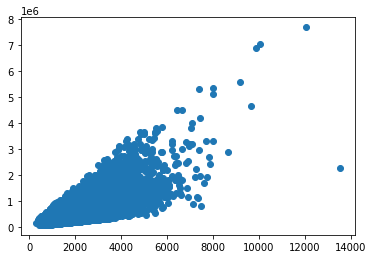

In [58]:
import matplotlib.pyplot as plt

plt.scatter(np.array(housing['sqft_living']), np.array(housing['price']))
plt.plot()

[]

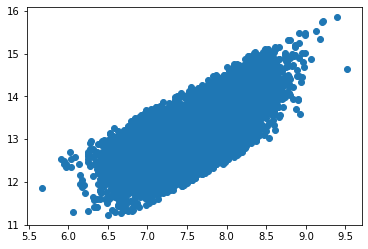

In [62]:
plt.scatter(np.log(np.array(housing['sqft_living'])), (np.log(np.array(housing['price']))))
plt.plot()

In [96]:
price = np.log(np.array(housing['price'], np.float32))
size = np.log(np.array(housing['sqft_living'], np.float32))

intercept = tf.Variable(10., np.float32)
slope = tf.Variable(0.1, np.float32)

#Linear Regression model
def linear_regression(intercept, slope, features=size):
    return intercept + features*slope

#Loss function to compute MSE
def loss_function(intercept, slope, targets = price, features = size):
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)

#Define an optimization operation
opt = tf.keras.optimizers.Adam()

#Minimize the loss function and print the loss
for j in range(1000):
    opt.minimize(lambda: loss_function(intercept,slope), var_list=[intercept,slope])

#Print every 100 loops
    if (j % 100) == 0:
        print(loss_function(intercept, slope).numpy())

print(intercept.numpy(), slope.numpy())

5.4664426
2.4482296
0.9850192
0.4135866
0.23932903
0.19873808
0.19155614
0.19057396
0.19044808
0.1904085
10.260733 0.37041798


[]

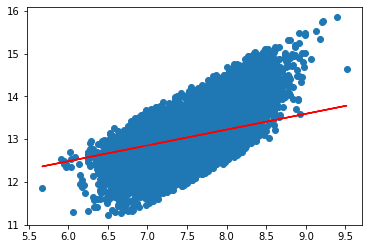

In [85]:
slope_ = slope.numpy()
intercept_ = intercept.numpy()
x = np.log(np.array(housing['sqft_living']))

plt.scatter(np.log(np.array(housing['sqft_living'])), np.log((np.array(housing['price']))))
plt.plot(x, intercept_ + x*slope_, c='r')
plt.plot()

#### Multiple Linear Regression

In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes

```py 
#Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

#Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	#Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	#Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

#Define the optimize operation
opt = keras.optimizers.Adam()

#Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)
```

#### Batch Training

* Full sample: One update per epoch
* Batch training: Multiple updates per epoch

It can be donde directly with `pd.read_csv`, with the `chunksize` parameters

```py
for batch in pd.read_csv(path + r'\kc_house_data.csv', chunksize = 100):
    price = np.array(batch['price'], np.float32)
    size = np.array(batch['size'], np.float32)
```

In [102]:
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

#Linear Regression model
def linear_regression(intercept, slope, features=size):
    return intercept + features*slope

#Loss function to compute MSE
def loss_function(intercept, slope, targets = price, features = size):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

opt = tf.keras.optimizers.Adam()

for batch in pd.read_csv(path + r'\kc_house_data.csv', chunksize = 100):
    price_batch = np.array(batch['price'], np.float32)
    size_batch = np.array(batch['sqft_living'], np.float32)

    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept,slope])

print(intercept.numpy(), slope.numpy())


0.31799173 0.31615734


### Neural Networks

#### Dense Layer

In dense layers, every weight is applied to all nodes from previous layer.

- Bias is not asociated with a feature, and is analogous to the intercept in a linear regression
* By default bias is included


In [105]:
df = pd.read_csv(path + r'\uci_credit_card.csv', delimiter = ',')


Low level approach, using linear algebra operations

In [114]:
import tensorflow as tf

inputs = tf.constant([[1,35]], dtype='float32')
weights = tf.Variable([[-0.05], [-0.01]])
bias = tf.Variable([0.5])

product = tf.matmul(inputs, weights) #Dot product
dense = tf.keras.activations.sigmoid(product+bias)


High level approach, using API operations

In [120]:
#Inputs layer
inputs = tf.constant(df, tf.float32)

#First Dense layer
dense1 = tf.keras.layers.Dense(10, activation ='sigmoid')(inputs)

dense2 = tf.keras.layers.Dense(5, activation ='sigmoid')(dense1)

#Output layer
output = tf.keras.layers.Dense(1, activation ='sigmoid')(dense2)

```py 
#High level approach with an input tensor [100x10]

#Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

#Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

#Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

#Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)
```

#### Activation function

- Sigmoid: In output layer of binary classification
- ReLU: In all layers other than the output layer
- Softmax: In output layer in clasification problem with more than two classes


In [129]:
#Define example borrower features
 
young, old = 0.3, 0.6
low_bill, high_bill = 0.1, 0.5

#Apply matrix multiplication step for all feature combinations
young_high = 1.0*young + 2.0*high_bill
young_low = 1.0*young + 2.0*low_bill
old_high = 1.0*old + 2.0*high_bill
old_low = 1.0*old + 2.0*low_bill

print(young_high, young_low, old_high, old_low)

print("Diff in default predictions for young", young_high - young_low)

print("Diff in default predictions for old", old_high - old_low)



print("Diff in default predictions for young (sigmod)",  tf.keras.activations.sigmoid(young_high).numpy() - tf.keras.activations.sigmoid(young_low).numpy())

print("Diff in default predictions for old (sigmod)", tf.keras.activations.sigmoid(old_high).numpy() - tf.keras.activations.sigmoid(old_low).numpy())


1.3 0.5 1.6 0.8
Diff in default predictions for young 0.8
Diff in default predictions for old 0.8
Diff in default predictions for young (sigmod) 0.16337568
Diff in default predictions for old (sigmod) 0.14204389


In [205]:
#Activation function in neural networks

bill_amounts = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3']]
default = df['default.payment.next.month']

# Construct input layer from features
inputs = tf.constant(bill_amounts, tf.float32)
default_tensor = tf.constant(default, tf.float32, shape=(len(default), 1))

# Define first dense layer
dense1 = tf.keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default_tensor[:5] - outputs.numpy()[:5]
print(error)

tf.Tensor(
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


#### Optimizers

* SGD
    - Good for simple problems
    - Simple and easy to interpret 
* Adam (adaptive moment)
    - futher improvements
    - Generally a good first choice
    -Performs better with default parameter values
* RMS (Root mean squared propagation)
    - Applies a different LR to each feature, useful for high dimensional problems
    - Allows for momentum to both build an decay

In [214]:
tf.keras.optimizers.SGD()

tf.keras.optimizers.Adam()

tf.keras.optimizers.RMSprop()


def model(bias, weights, features=bill_amounts):
    product = tf.matmul(features, weights)
    return tf.keras.activations.sigmoid(product+bias)

def loss_function(bias, weights, target=default, features = bill_amounts):
    predictions = model(bias, weights)
    return tf.keras.losses.binary_crossentropy(targets, predictions)

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.9)
#opt.minimize(lambda: loss_function(bias, weights), var_list = [bias, weights])

In [219]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0,tf.float32)
x_2 = tf.Variable(0.3,tf.float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

TypeError: loss_function() missing 1 required positional argument: 'weights'

#### Training a network in TensorFlow


* Often need to initialize thousand of variables
* Alternatively, draw initial values from dustribution
    - Normal
    - Uniform
    - Glorot initializer

In [221]:
#LOW LEVEL

weights = tf.Variable(tf.random.normal([500,500]))

#Discard very large and very small draws
weights = tf.Variable(tf.random.truncated_normal([500,500]))

In [222]:
#HIGH LEVEL

#Default initializer
dense = tf.keras.layers.Dense(32, activation='relu')

#Zeros initializer
dense = tf.keras.layers.Dense(32, activation='relu', kernel_initializer='zeros')

#### Dropout

A simple solution for overfitting is to use `dropout`, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process.

In [231]:
import tensorflow as tf

inputs = np.array(bill_amounts, np.float32)

dense1 = tf.keras.layers.Dense(32, activation='relu')(inputs)
dense2 = tf.keras.layers.Dense(16, activation='relu')(dense1)

#Specifies to drop the weights connected to 25% of nodes randomly
dropout1 = tf.keras.layers.Dropout(0.25)(dense2)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dropout1)

In [242]:
#Full Example

# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]), tf.float32)

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]), tf.float32)

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7, 1]), tf.float32)

# Define the layer 2 bias
b2 = tf.Variable(0.0, tf.float32)


# Define the model
def model(w1, b1, w2, b2, features = bill_amounts):
	# Apply relu activation functions to layer 1
	layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = tf.keras.layers.Dropout(0.25)(layer1)
	return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = bill_amounts, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return tf.keras.losses.binary_crossentropy(targets, predictions)


# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model using test features
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]

### High Level APIs

#### NN with Keras

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential()

#First layer
model.add(Dense(16, activation='relu', input_shape=(28*28,)))

#Second layer
model.add(Dense(8, activation='relu'))

#Output layer
model.add(Dense(4, activation='softmax'))

#Compilation
model.compile(activation = 'adam', loss='categorical_crossentropy')


Using two models

In [8]:
import tensorflow as tf

model1_inputs = tf.keras.Input(shape=(28*28,))
model2_inputs = tf.keras.Input(shape=(10,))

model1_layer1 = Dense(12, activation='relu')(model1_inputs)
model1_layer2 = Dense(4, activation='softmax')(model1_layer1)

model2_layer1 = Dense(8, activation='relu')(model2_inputs)
model2_layer2 = Dense(4, activation='softmax')(model2_layer1)

#Merge model 1 and 2
merged = tf.keras.layers.add([model1_layer2, model2_layer2])

#Define a functional model

model = tf.keras.Model(inputs=[model1_inputs, model2_inputs], outputs = merged)

model.compile('adam', loss = 'categorical_crossentropy')

# Print the model architecture
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 12)           9420        ['input_3[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 8)            88          ['input_4[0][0]']                
                                                                                            

#### Training and validation with Keras

1. Load and clean input_data
2. Define model
3. Train and validate model
4. Evaluate model

In [12]:
model = tf.keras.Sequential()

model.add(Dense(16, activation='relu', input_shape = (784,)))
model.add(Dense(4, activation='softmax'))

model.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])


#model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#model.fit(image_features, image_labels)

#model.fit(image_features, image_labels, epoch=10, validation_split=0.2)

#model.evaluate(test)

#### Training models with the Estimators API

1. Define feature columns
2. Load and transform daa
3. Define an estimator
4. Apply train operation

In [21]:
size = tf.feature_column.numeric_column("size")

rooms = tf.feature_column.categorical_column_with_vocabulary_list("rooms", ['1','2','3','4','5'])

features_list = [size, rooms]

features_list = [tf.feature_column.numeric_column('image', shape=(784,))]

def input_fn():
    features = {'size' : [1340, 1690, 2720],
                'rooms' : [1,3,4]}
    labels = [221900, 538000, 180000]

    return features, labels

#Define a deep NN regression
model0 = tf.estimator.DNNRegressor(feature_columns = features_list, hidden_units=[10,6,6,3])

#Train the regression model
model0.train(input_fn, steps=20)


#FOR CLASSIFICATION

#Define a deep NN classifier
model0 = tf.estimator.DNNClassifier(feature_columns = features_list, hidden_units=[32,16,8], n_classes=4)

#Train the classifier
model0.train(input_fn, steps=20)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LLerma\\AppData\\Local\\Temp\\tmpmq7ayqx3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


ValueError: Feature image is not in features dictionary.

---

## 3_Introduction to Keras

### Introducing Keras

- Fully integrrated into TensorFlow 2
- Can use TF for low level features
- NN good for unstructured data

### Going Deeper

#### Binary Classification

* Sigmoid: Used for binary classification, because the output is 0 or 1

* loss='binary_crossentropy'

In [3]:
import pandas as pd

path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

banknotes = pd.read_csv(path + r'\banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.

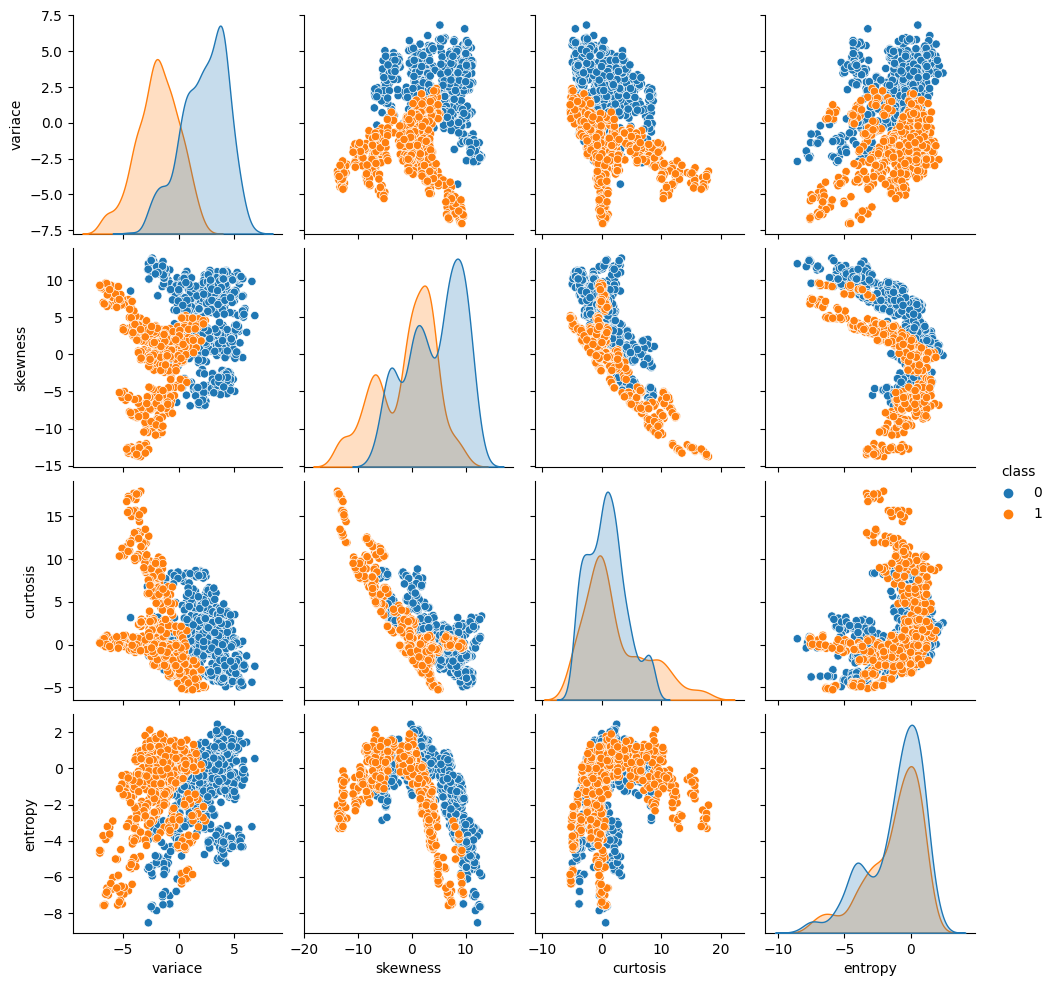

Dataset stats: 
 <bound method NDFrame.describe of       variace  skewness  curtosis  entropy  class
0     3.62160   8.66610   -2.8073 -0.44699      0
1     4.54590   8.16740   -2.4586 -1.46210      0
2     3.86600  -2.63830    1.9242  0.10645      0
3     3.45660   9.52280   -4.0112 -3.59440      0
4     0.32924  -4.45520    4.5718 -0.98880      0
...       ...       ...       ...      ...    ...
1367  0.40614   1.34920   -1.4501 -0.55949      1
1368 -1.38870  -4.87730    6.4774  0.34179      1
1369 -3.75030 -13.45860   17.5932 -2.77710      1
1370 -3.56370  -8.38270   12.3930 -1.28230      1
1371 -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [5]:
# Import seaborn
import seaborn  as sns
import matplotlib.pyplot as plt

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe)

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

#### Multiclass Classification


* activation = 'softmax' #In the output layer
* loss='categorical_crossentropy'

In [27]:
path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

darts = pd.read_csv(path + r'\darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


Multiclass classification example

In [39]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)


# Fit your model to the training data for 200 epochs
model.fit(coordinates,competitors,epochs=5, metrics=['accuracy'])

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coordinates, competitors)[1]

# Print accuracy
print('Accuracy:', accuracy)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
Epoch 1/5
25/25 [==============================] - 0s 2ms/step - loss: 1.3699 - accuracy: 0.2438
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 1.3240 - accuracy: 0.2875
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 1.2595 - accuracy: 0.4212
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 1.1663 - accuracy: 0.4762
Epoch 5/5
25/25 [==============================] - 0s 1ms/step - loss: 0.9764 - accuracy: 0.5800
Accuracy: 0.5799999833106995


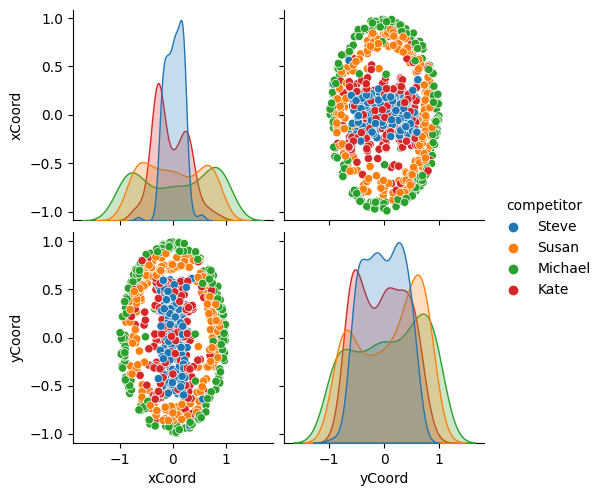

In [ ]:
# Use pairplot and set the hue to be our class column
sns.pairplot(darts, hue='competitor') 

# Show the plot
plt.show()


#### Multi-label Classification

* activation = 'sigmoid' #In the output layer
* loss='binary_crossentropy'

An example is a movie with more than 1 genre.

* This biggest difference compared to multiclass, is that the output layer and its activation function.
* In the output layer, we have as many neurons as possible clauses

In [43]:
path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

irrigation_machine = pd.read_csv(path + r'\irrigation_machine.csv')
irrigation_machine.head(1)

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0


Multi-label classification example

In [45]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                1344      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


#### Keras callbacks

A callback i s a function that is executed after some other function, event or task has finished.

A keras callback is a block of code that gets executed after eacg epoch during training or after the training has finished.

* To get the most, we should use the validation_data parameter in the fit method.

```py
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    validation_data = (X_test,y_test), 
                    metrics=['accuracy'])
history.history['loss']
history.history['val_loss']
history.history['val_accuracy']

#Comparing test vs validation
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.show()

#Early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
#Patience is number of epochs to wait

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    validation_data = (X_test,y_test), 
                    metrics=['accuracy']
                    callbacks = [early_stopping])


#Model Checkpoint

from keras.callbacks import ModelCheckpoint

model_save = ModelCheckpoint(   'best_model.hdf5',
                                save_best_only=True)

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    validation_data = (X_test,y_test), 
                    metrics=['accuracy']
                    callbacks = [model_save])
```




### Improving your model performance

#### Learning curves

```py 
#Code
initial_weights = model.get_weights()

train_accs = []
tests_accs = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ =  train_test_split(X_train, y_train, train_size = train_size)

    model.set_weights(initial_weights)


    model.fit(  X_train_frac, y_train_frac, epochs = 100,
                verbose = 0
                callbacks = [EarlyStopping(monitor = 'loss', patience = 1)])

    
    #Accuracy for the set fraction
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)

    #Accuracy for the whole set
    tests_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    tests_accs.append(tests_acc)
```



```py 
#Example

#_Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

#_Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])


#Do we need more data?

training_sizes = [ 125,  502,  879, 1255]

for size in training_sizes:
  	#Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    #Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    #Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
#Plot train vs test accuracies
plot_results(train_accs, test_accs)
```



#### Activation functions

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

activations = ['relu', 'sigmoid','tanh']
activation_results = {}

np.random.seed(1)

def get_model(act_function):
    model=Sequential()
    model.add(Dense(4, input_shape=(2,), activation = act_function))
    model.add(Dense(1, activation='sigmoid'))
    return model

'''
for funct in activations:
    model = get_model(act_function= funct)
    history = model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=0)
    activation_results[funct] = history
'''

#Comparing activation functions

import pandas as pd

val_loss_per_funct = {k:v.history['val_loss'] for k, v in activation_results.items()}

val_loss_curves = pd.DataFrame(val_loss_per_funct)

#### Batch normalization

model.fit(X_train, y_train, epochs=100, batch_size=128)

Bacth normalizarion is used as a layer:
1. Improves gradient flow
2. Allow higher learning reates
3. Reduces dependence
4. Acts as regularization form

* $Standarization = \frac{data-mean}{\sigma} $ 

In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

#model.add...
#model.add(BatchNormalization())
#model.add...

''' 
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
'''



" \nbatchnorm_model = Sequential()\nbatchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))\nbatchnorm_model.add(BatchNormalization())\nbatchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))\nbatchnorm_model.add(BatchNormalization())\nbatchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))\nbatchnorm_model.add(BatchNormalization())\nbatchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))\n"

#### Hyperparameter tuning

```py 
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier()

params = { 'max_depth': [3,None], 'max_features':range(1,4), 'min_samples_leaf': range(1,4)}

tree_cv = RandomizedSearchCV(tree, params, cv=5)
tree_cv.fit(X,y)

print(tree_cv.best_params_)

#---------------EXAMPLE---------------

def create_model(optimizer, activation):
    ...
    return model

#Import wrapper
from tensorflow.keras.wrappers.sickit_learn import KerasClassifier

#Create model as sklearn estimator
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16)

from sklearn.model_selection import cross_val_score

kfold = cross_val_score(model, X, y, cv=5)

#Print
kfold.mean()
kfold.std()

#---------------KERAS EXAMPLE---------------

params = dict(  optimizer = ['sgd', 'adam'], 
                epochs=3,
                batch_size = [5,10,20],
                activation='relu', 'tanh')

random_search = RandomizedSearchCV(model, params_dist=params, cv=3)

random_search_results = random_search.fit(X,y)

#random_search_results.best_score_
#random_search_results.best_params_

```

### Advanced Model Architectures

#### Autoencoders

```py
Accessing the first layer
#first_layer=model.layers[0]
#first_layer.input
#first_layer.output
#first_layer.weights

Import Keras Backend

import tensorflow.keras.backend as K

inp = model.layers[0].input
out = model.layers[0].output

inp_to_out = K.function([inp], [out])

inp_to_out([X_train])
```


Produce same outputs as inputs

1. Dimensionality reduction
2. De-noising input_data
3. Anomaly detection

```py
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.predict(X_test)
```

#### CNN

```py 
#Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D,Flatten
model = Sequential()

#Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

#Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(filters=16, kernel_size = 3 , activation = 'relu'))

#Flatten the previous layer output
model.add(Flatten())

#Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))


#------------ Pre Processing for ResNet50 ----------

#Import image and preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

#Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

#Turn it into an array
img_array = image.img_to_array(img)

#Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

#Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)


#------------ RESNET 50 ----------

#Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

#Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

#Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])
```

#### LSTM (Long Short Term Memory)

Like RNN: Recurren Neural Network
- Can use past predictions in order to infer new ones
- Allows to solve problems where is a dependence on psat inputs

When to use LSTM?
- Image captioning
- Speech to text
- Text translation
- Document summarization
- Text generation
- Musical composition

In [24]:
text = 'hi this is a small sentence'

seq_len = 3

words = text.split()
words

['hi', 'this', 'is', 'a', 'small', 'sentence']

In [26]:
lines = []

for i in range(seq_len, len(words) + 1):
    line = ' '.join(words[i-seq_len:i])
    lines.append(line)

lines

['hi this is', 'this is a', 'is a small', 'a small sentence']

Now, we turn the text sequences into numbers

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(lines)

sequences = tokenizer.texts_to_sequences(lines)

print(tokenizer.index_word)

{1: 'is', 2: 'a', 3: 'this', 4: 'small', 5: 'hi', 6: 'sentence'}


In [30]:
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()

vocab_size = len(tokenizer.index_word) + 1

model.add(Embedding(input_dim = vocab_size, output_dim=8, input_length=2))

model.add(LSTM(8))

model.add(Dense(8, activation='relu'))

model.add(Dense(vocab_size, activation='softmax'))


Decode your predictions

Your LSTM model has already been trained (details in the previous exercise success message) so that you don't have to wait. It's time to define a function that decodes its predictions. The trained model will be passed as a default parameter to this function.

Since you are predicting on a model that uses the softmax function, numpy's argmax() can be used to obtain the index/position representing the most probable next word out of the output vector of probabilities.

The tokenizer you previously created and fitted, is loaded for you. You will be making use of its internal index_word dictionary to turn the model's next word prediction (which is an integer) into the actual written word it represents.

You're very close to experimenting with your model!

In [31]:
def predict_text(test_text, model = model):
  if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Use the model passed as a parameter to predict the next word
  pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word that maps to the prediction
  return tokenizer.index_word[pred]

---

## 4_Advanced Deep Learning with Keras

### 1. The Keras Functional API

In [9]:
game_season = pd.read_csv(r"C:\Users\LLerma\Documents\GitHub\Learning\Datasets\basketball_data\games_season.csv")
games_season = pd.read_csv(r"C:\Users\LLerma\Documents\GitHub\Learning\Datasets\basketball_data\games_season.csv")
game_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


In [54]:
print(game_season.shape)

(312178, 8)


In [10]:
games_tourney = pd.read_csv(r"C:\Users\LLerma\Documents\GitHub\Learning\Datasets\basketball_data\games_tourney.csv")
game_tourney = pd.read_csv(r"C:\Users\LLerma\Documents\GitHub\Learning\Datasets\basketball_data\games_tourney.csv")
games_tourney.head()


,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


### 2. Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers

#### Category embeddings

* There are an advanced type of layer (lookup table). 
* They increase the dimensionality of the data (useful for images and text), so after adding these layers, it's needed to add a Flatten layer to move into 2D again

In [24]:
from tensorflow.keras.layers import Embedding
from keras.layers import * 

input_tensor = Input(shape=(1,))
n_teams = 10887
embed_layer = Embedding(    input_dim = n_teams,
                            input_length = 1,
                            output_dim = 1,
                            name = 'Team-Strength-Lookup')

embed_tensor = embed_layer(input_tensor)

#THEN FLATTEN

flatten_tensor = Flatten()(embed_tensor)

model = tensorflow.keras.Model(input_tensor, flatten_tensor)


#### Shared layers

* Two inputs
* Use same embedding layer

```py
#Diagram
input_1  \                      / Output_1 
          ---  Shared_layer ---  
input_2  /                      \ Output_2
```

In [26]:
input_tensor_1 = Input(shape=(1,))
input_tensor_2 = Input(shape=(1,))

shared_layer = Dense(1)

output_tensor_1 = shared_layer(input_tensor_1)
output_tensor_2 = shared_layer(input_tensor_2)

In [27]:
#Using last model

model = tensorflow.keras.Model(input_tensor, flatten_tensor)

input_tensor_1 = Input(shape=(1,))
input_tensor_2 = Input(shape=(1,))

output_tensor_1 = model(input_tensor_1)
output_tensor_2 = model(input_tensor_2)

#### Merged layers

It's used to combine the inputs into a single layer that can be used to predict a single output.

Ther are many merge layers available in Keras:
1. Add
2. Substract
3. Multiply
4. Concatenate

In [36]:
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model 

in_tensor_1 = Input((1,))
in_tensor_2 = Input((1,))

out_tensor = Add()([in_tensor_1, in_tensor_2])
#out_tensor = Add()([in_tensor_1, in_tensor_2,...]) - For more inputs

model = Model([in_tensor_1, in_tensor_2], out_tensor)

model.compile(optimizer = 'adam', loss='mean_absolute_error')

#### Predict from your model

In [ ]:
#Fitting with multiple inputs

model.fit([data_1, data_2], target)

In [34]:
model.predict([np.array([[1]]),np.array([[2]])])

1/1 [==============================] - 0s 168ms/step


array([[3.]], dtype=float32)

In [41]:
#The error for this evaluation is 0

model.evaluate([np.array([[-1]]),np.array([[-2]])], np.array([[-3]]))

1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00


0.0

In [52]:
#EXCERCISE

# Imports
from tensorflow.keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(game_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

# Imports
from tensorflow.keras.layers import Input, Embedding, Flatten
from tensorflow.keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

# Load the input layer from tensorflow.keras.layers
from tensorflow.keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

# Imports
from tensorflow.keras.layers import Subtract
from tensorflow.keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Get the team_1 column from the regular season data
input_1 = game_season['team_1']

# Get the team_2 column from the regular season data
input_2 = game_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          game_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=.1,
          verbose=True)

138/138 [==============================] - 1s 3ms/step - loss: 12.1204 - val_loss: 11.8382


### 3. Multiple Inputs: 3 Inputs (and Beyond!)

In [57]:
from tensorflow.keras.layers import Dense, Input, Concatenate

input_tensor_1 = Input(shape=(1,))
input_tensor_2 = Input(shape=(1,))
input_tensor_3 = Input(shape=(1,))

out_tensor = Concatenate()([input_tensor_1,input_tensor_2,input_tensor_3])

output_tensor = Dense(1)(out_tensor)

In [70]:
from tensorflow.keras.models import Model

model = Model([input_tensor_1,input_tensor_2,input_tensor_3], output_tensor)


shared_layer = Dense(1)

shared_tensor_1 = shared_layer(in_tensor_1)
shared_tensor_2 = shared_layer(in_tensor_1)

# out_tensor = Concatenate([shared_tensor_1, shared_tensor_2, input_tensor_3])
# out_tensor = Dense(1)(out_tensor)

In [72]:
model = Model([input_tensor_1,input_tensor_2,input_tensor_3], output_tensor)

#### Stacking models


Using the prediction form one model as an input to another model.

```py

1
#Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'],games_tourney['home']])

2
#Create an input layer with 3 columns
input_tensor = Input((3,))

#Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

#Create a model
model = Model(input_tensor, output_tensor)

#Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

3
#Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

4
#Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'prediction']],
               games_tourney_test['score_diff'], verbose=False))
```

In [81]:
#EXCERCISE

# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

#######----------------------------------------------########

# Import the model class
from tensorflow.keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

#######----------------------------------------------########

# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=0.1,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
          games_tourney['score_diff'], verbose=False))


#######----------------------------------------------########

# Summarize and plot
'''
# Imports
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()
'''

138/138 [==============================] - 1s 3ms/step - loss: 12.1680 - val_loss: 11.9626
11.694355964660645


"\n# Imports\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras.utils import plot_model\n\n# Plot the model\nplot_model(model, to_file='model.png')\n\n# Display the image\ndata = plt.imread('model.png')\nplt.imshow(data)\nplt.show()\n"

### 4. Multiple Outputs

#### Two Output models

In [28]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(1,))
output_tensor=Dense(2)(input_tensor)

model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mean_absolute_error')

x = games_tourney[['seed_diff']]
y = games_tourney[['score_1', 'score_2']]

model.fit(x,y, epochs=2)

Epoch 1/2
133/133 [==============================] - 0s 1ms/step - loss: 71.0665
Epoch 2/2
133/133 [==============================] - 0s 1ms/step - loss: 70.9331


In [34]:
#The first pair are the "slopes" and the second pair are the "means"/"bias"/"intercept"
model.get_weights()

[array([[ 0.6664115 , -0.70883846]], dtype=float32),
 array([0.26600003, 0.26600003], dtype=float32)]

In [16]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


#### Single model for classification and regression

In [39]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(1,))
output_tensor_reg = Dense(1)(input_tensor)
output_tensor_class = Dense(1, activation='sigmoid')(output_tensor_reg)

#With two output models, each output needs its own loss function
model = Model(input_tensor, [output_tensor_reg,output_tensor_class])
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer='adam')

X = games_tourney[['seed_diff']]
y_reg = games_tourney[['score_diff']]
y_class = games_tourney[['won']]
model.fit(X, [y_reg, y_class], epochs=2)

Epoch 1/2
133/133 [==============================] - 1s 2ms/step - loss: 12.0396 - dense_25_loss: 11.3705 - dense_26_loss: 0.6691
Epoch 2/2
133/133 [==============================] - 0s 2ms/step - loss: 11.5175 - dense_25_loss: 10.9162 - dense_26_loss: 0.6013


In [30]:
model.get_weights()

[array([[ 0.6664115 , -0.70883846]], dtype=float32),
 array([0.26600003, 0.26600003], dtype=float32)]

In [32]:
model.get_weights()[1][0]

0.26600003

In [33]:
from scipy.special import expit as sigmoid
print(sigmoid(1*model.get_weights()[1][0] + model.get_weights()[1][1]))

0.6299494744085234


In [41]:
model.evaluate(X, [y_reg, y_class])

#1. Loss function by the model
#2. Loss for the regression model
#3. Loss for the classification model

133/133 [==============================] - 0s 1ms/step - loss: 11.2807 - dense_25_loss: 10.7101 - dense_26_loss: 0.5706


[11.280675888061523, 10.710082054138184, 0.5705968141555786]

In [42]:
#-----EXCERCISE-----

#1

#Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

#Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

#Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

#Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

---